In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')
print(df.head())

  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit C

In [4]:
df.drop(['Customer ID', 'Name', 'Property ID'],axis =1 ,inplace=True)
print(df.shape)

df = df.dropna(subset=['Loan Sanction Amount (USD)'])
print (df.shape)

(30000, 21)
(29660, 21)


In [5]:
missing_counts = df.isnull().sum()
print(missing_counts)

Gender                           52
Age                               0
Income (USD)                   4493
Income Stability               1658
Profession                        0
Type of Employment             7188
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     167
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2446
Credit Score                   1670
No. of Defaults                   0
Has Active Credit Card         1546
Property Age                   4760
Property Type                     0
Property Location               347
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64


In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
print("Missing values after handling [VERIFICATION]")
print(df.isnull().sum().sum())


Missing values after handling [VERIFICATION]
0


C:\Users\mahad\AppData\Local\Temp\ipykernel_25344\3974641790.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=['object']).columns


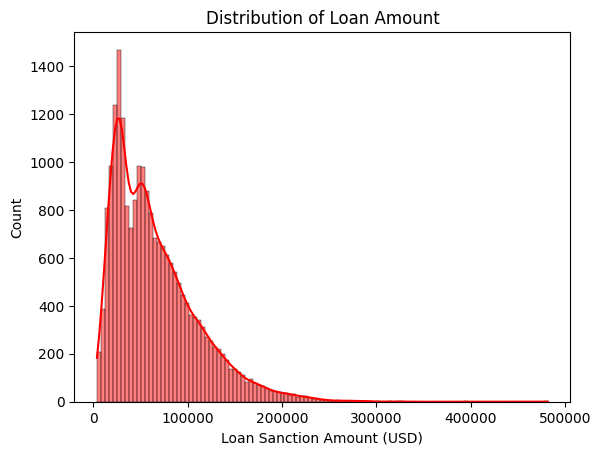

In [7]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df = df[df['Loan Sanction Amount (USD)'] > 0]
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True, color='red')
plt.title('Distribution of Loan Amount')
plt.show()

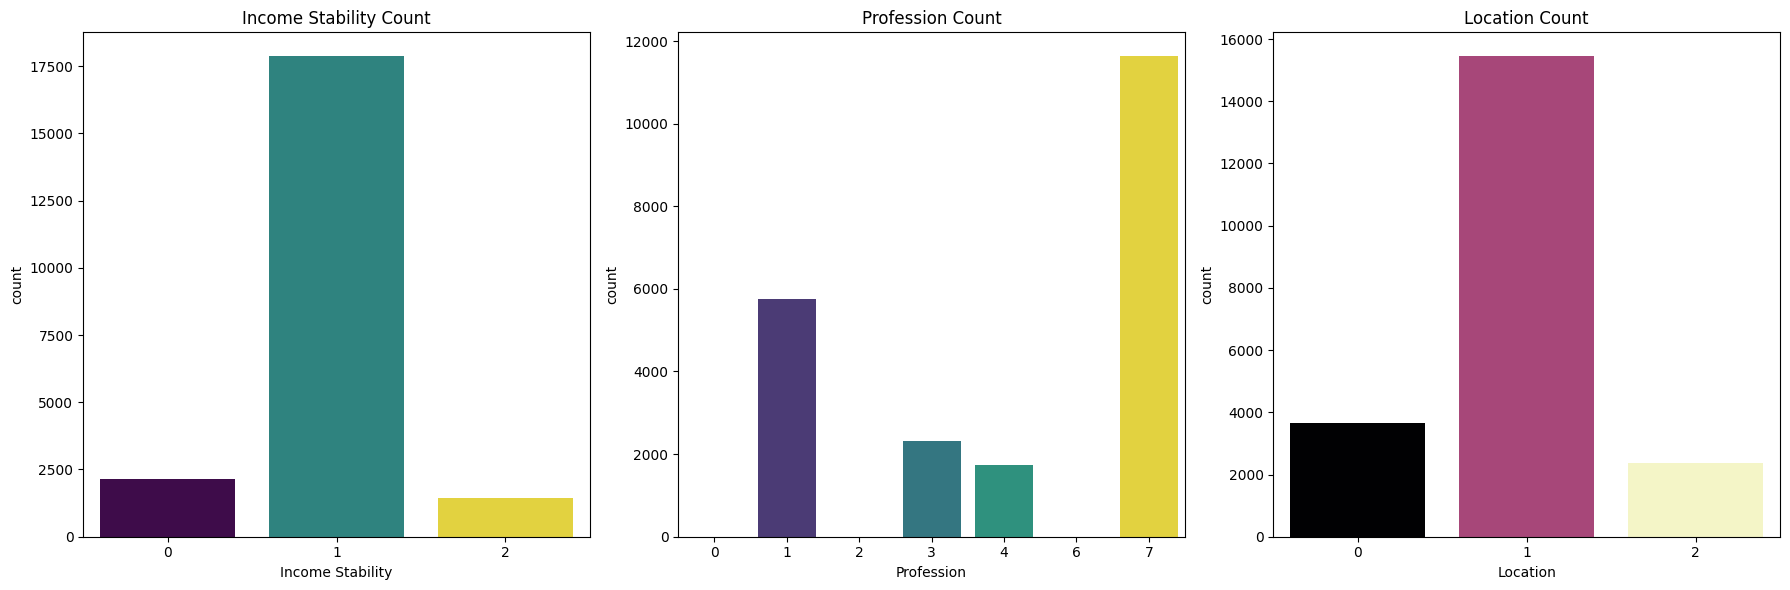

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(
    x='Income Stability',
    hue='Income Stability',
    data=df,
    ax=axes[0],
    palette='viridis',
    legend=False
)
axes[0].set_title('Income Stability Count')

sns.countplot(
    x='Profession',
    hue='Profession',
    data=df,
    ax=axes[1],
    palette='viridis',
    legend=False
)
axes[1].set_title('Profession Count')

sns.countplot(
    x='Location',
    hue='Location',
    data=df,
    ax=axes[2],
    palette='magma',
    legend=False
)
axes[2].set_title('Location Count')

plt.tight_layout()
plt.show()


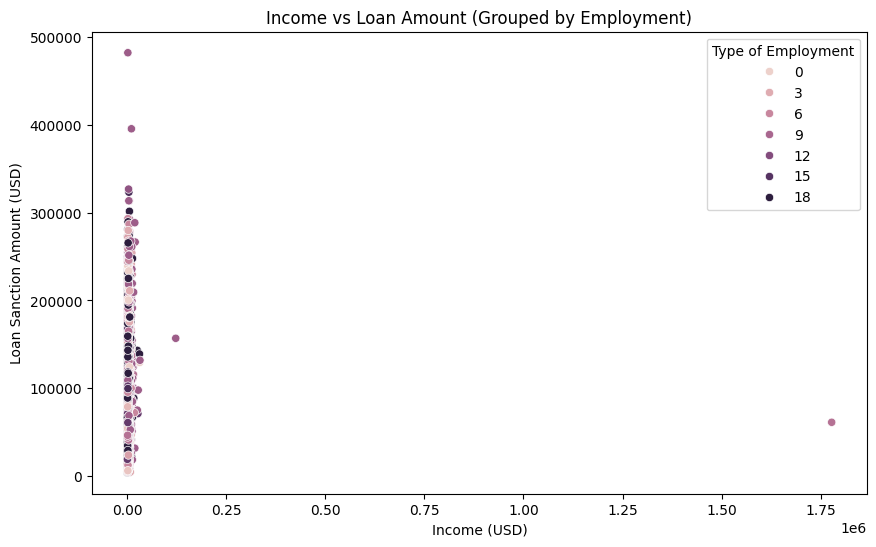

Number 0 means: Accountants
Number 1 means: Cleaning staff
Number 2 means: Cooking staff
Number 3 means: Core staff
Number 4 means: Drivers
Number 5 means: HR staff
Number 6 means: High skill tech staff
Number 7 means: IT staff
Number 8 means: Laborers
Number 9 means: Low-skill Laborers
Number 10 means: Managers
Number 11 means: Medicine staff
Number 12 means: Private service staff
Number 13 means: Realty agents
Number 14 means: Sales staff
Number 15 means: Secretaries
Number 16 means: Security staff
Number 17 means: Waiters/barmen staff
Number 18 means: nan


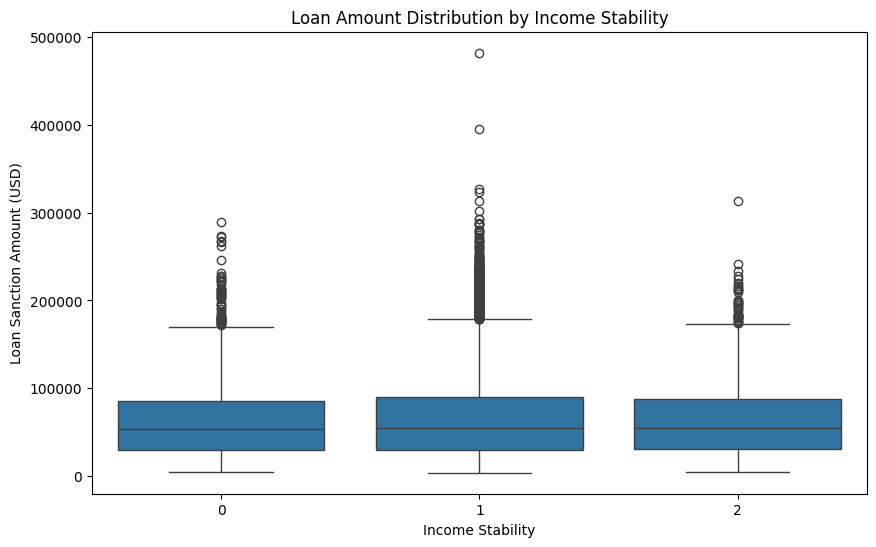

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income (USD)', y='Loan Sanction Amount (USD)', hue='Type of Employment', data=df)# use legend='full' if want to see the full thing
plt.title('Income vs Loan Amount (Grouped by Employment)')
plt.show()

for index, label in enumerate(encoders['Type of Employment'].classes_):
    print(f"Number {index} means: {label}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Stability', y='Loan Sanction Amount (USD)', data=df)
plt.title('Loan Amount Distribution by Income Stability')
plt.show()

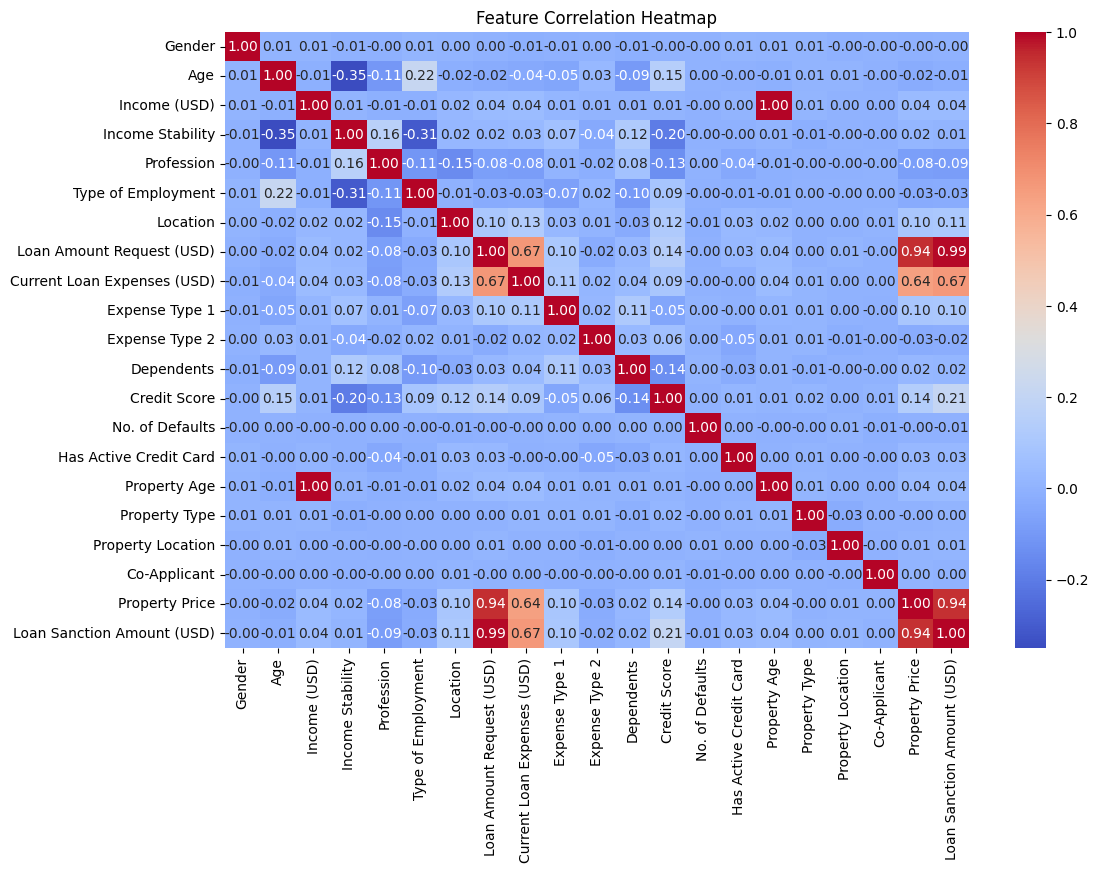

In [11]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_final = pd.DataFrame(X_scaled, columns=X.columns)
X = X_final


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training shapes: {X_train.shape}, {y_train.shape}")
print(f"Testing shapes: {X_test.shape}, {y_test.shape}")

Training shapes: (17165, 20), (17165,)
Testing shapes: (4292, 20), (4292,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 3736.34
RMSE: 5576.15
R2 Score: 0.99


In [14]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

enet = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio=0.5 means 50% Lasso, 50% Ridge
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)

In [15]:
results = {
    "Model": ["Ridge", "Lasso", "Elastic Net"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_enet)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_enet)
    ]
}

print(pd.DataFrame(results))

         Model          MAE  R2 Score
0        Ridge  3736.315081  0.985198
1        Lasso  3735.974004  0.985205
2  Elastic Net  4460.673938  0.978412


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_cv.best_params_}")
print(f"Best Lasso Alpha: {lasso_cv.best_params_}")

enet_params = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

enet_cv = GridSearchCV(ElasticNet(), enet_params, cv=5, scoring='r2')
enet_cv.fit(X_train, y_train)

print(f"Best Elastic Net Params: {enet_cv.best_params_}")

C:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.587e+10, tolerance: 2.756e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.446e+10, tolerance: 2.713e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\mahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best Ridge Alpha: {'alpha': 1}
Best Lasso Alpha: {'alpha': 10}
Best Elastic Net Params: {'alpha': 0.1, 'l1_ratio': 0.8}


In [17]:
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
best_enet = enet_cv.best_estimator_

models = [best_ridge, best_lasso, best_enet]
model_names = ["Tuned Ridge", "Tuned Lasso", "Tuned Elastic Net"]

for name, model in zip(model_names, models):
    score = model.score(X_test, y_test)
    print(f"{name} R2 Score: {score:.4f}")

Tuned Ridge R2 Score: 0.9852
Tuned Lasso R2 Score: 0.9856
Tuned Elastic Net R2 Score: 0.9834


In [18]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": ridge_cv.best_estimator_,
    "Lasso Regression": lasso_cv.best_estimator_,
    "Elastic Net Regression": enet_cv.best_estimator_
}

scoring = {
    "mae": make_scorer(mean_absolute_error, greater_is_better=False),
    "mse": make_scorer(mean_squared_error, greater_is_better=False),
    "r2": make_scorer(r2_score)
}

cv_results = []

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    cv_results.append([
        name,
        -scores["test_mae"].mean(),
        -scores["test_mse"].mean(),
        np.sqrt(-scores["test_mse"].mean()),
        scores["test_r2"].mean()
    ])

table2 = pd.DataFrame(
    cv_results,
    columns=["Model", "MAE", "MSE", "RMSE", "R²"]
)

table2


,Model,MAE,MSE,RMSE,R²
0,Linear Regression,3609.000583,2.764272e+07,5257.634035,0.986109
1,Ridge Regression,3608.588185,2.764016e+07,5257.391122,0.986110
2,Lasso Regression,3605.700848,2.762616e+07,5256.059731,0.986117
3,Elastic Net Regression,3825.689632,3.179339e+07,5638.563133,0.984025


In [19]:
models = {
    "Linear Regression": model,
    "Tuned Ridge": best_ridge,
    "Tuned Lasso": best_lasso,
    "Tuned Elastic Net": best_enet
}

eval_metrics = []

for name, model_obj in models.items():
    preds = model_obj.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    
    eval_metrics.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse,2),
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 4)
    })

results_df = pd.DataFrame(eval_metrics)
print(results_df.sort_values(by="R2 Score", ascending=False))

               Model      MAE          MSE     RMSE  R2 Score
2        Tuned Lasso  3719.83  30323919.93  5506.72    0.9856
1        Tuned Ridge  3736.13  31082233.67  5575.14    0.9852
0  Linear Regression  3960.60  34931250.26  5910.27    0.9834
3  Tuned Elastic Net  3960.60  34931250.26  5910.27    0.9834


In [20]:
coef_table = pd.DataFrame({
    "Feature": X_train.columns,
    "Linear": models["Linear Regression"].coef_,
    "Ridge": models[ "Tuned Ridge"].coef_,
    "Lasso": models["Tuned Lasso"].coef_,
    "Elastic Net": models["Tuned Elastic Net"].coef_
})

coef_table

,Feature,Linear,Ridge,Lasso,Elastic Net
0,Gender,17.580328,-13.749662,-3.332303,17.580328
1,Age,2.577235,-8.053297,-0.000000,2.577235
2,Income (USD),14.711576,467.419995,-0.000000,14.711576
3,Income Stability,113.774970,96.178853,83.734410,113.774970
4,Profession,-62.116131,-49.089305,-34.995102,-62.116131
5,Type of Employment,-95.298883,-77.458892,-67.525299,-95.298883
6,Location,64.721397,72.108777,59.081410,64.721397
7,Loan Amount Request (USD),37114.264323,43555.327303,43567.138220,37114.264323
8,Current Loan Expenses (USD),724.552055,-105.200195,-87.614799,724.552055
9,Expense Type 1,1.649791,-40.258424,-35.701416,1.649791


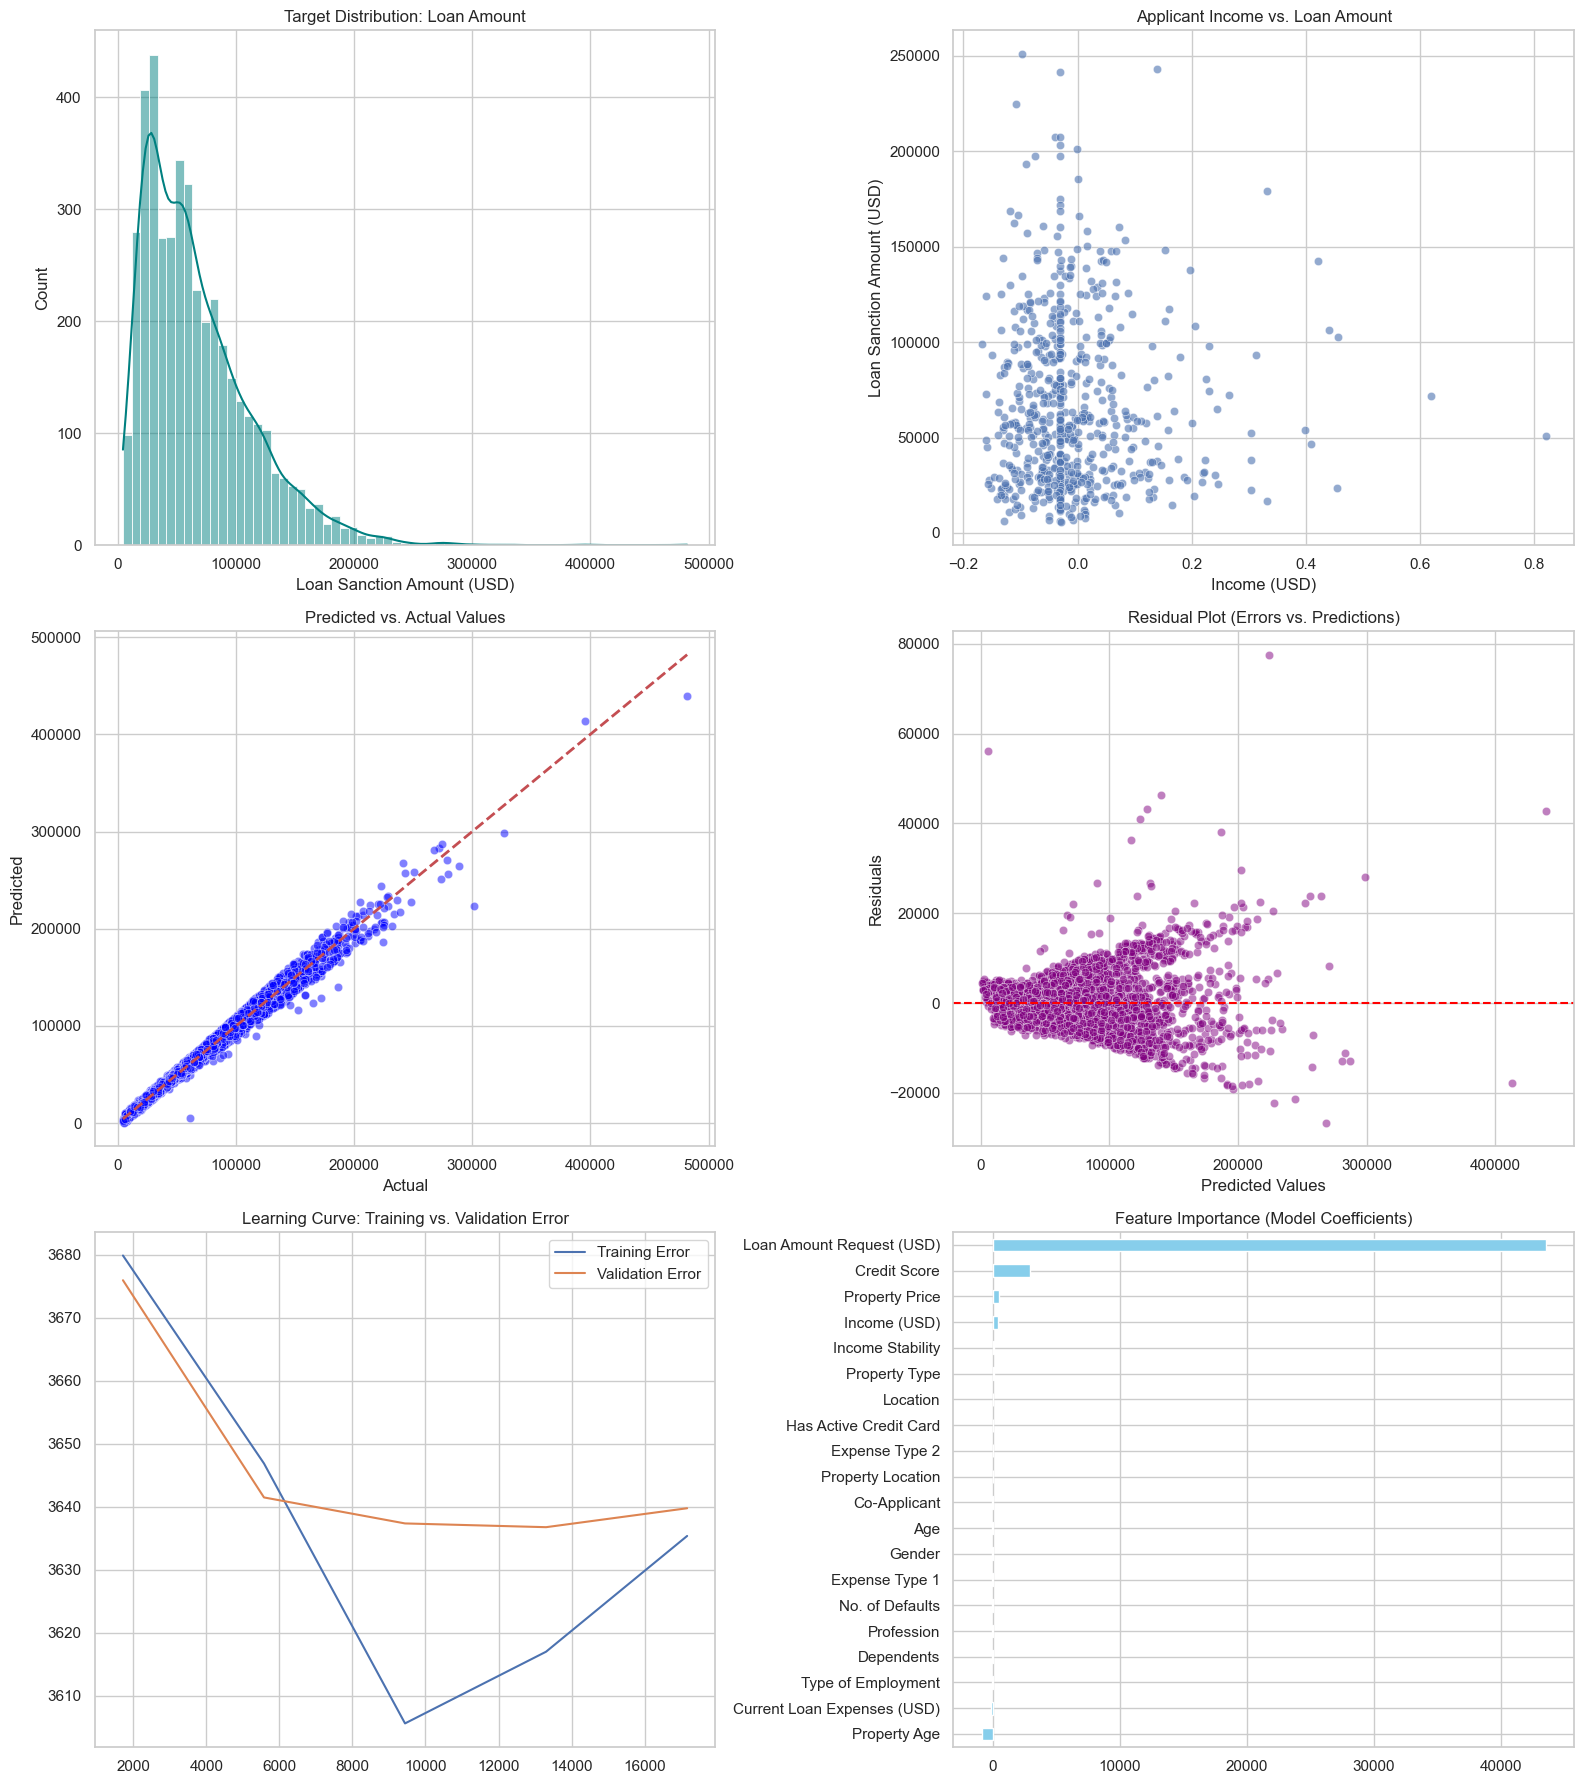

In [21]:
y_pred = best_ridge.predict(X_test)
residuals = y_test - y_pred

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

sns.histplot(y_test, kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Target Distribution: Loan Amount')

sns.scatterplot(x=X_test['Income (USD)'], y=y_test, ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Applicant Income vs. Loan Amount')

sns.scatterplot(x=y_test, y=y_pred, ax=axes[1, 0], color='blue', alpha=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_title('Predicted vs. Actual Values')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')

sns.scatterplot(x=y_pred, y=residuals, ax=axes[1, 1], color='purple', alpha=0.5)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title('Residual Plot (Errors vs. Predictions)')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')


train_sizes, train_scores, val_scores = learning_curve(best_ridge, X, y, cv=5, scoring='neg_mean_absolute_error')
train_mae = -train_scores.mean(axis=1)
val_mae = -val_scores.mean(axis=1)

axes[2, 0].plot(train_sizes, train_mae, label='Training Error')
axes[2, 0].plot(train_sizes, val_mae, label='Validation Error')
axes[2, 0].set_title('Learning Curve: Training vs. Validation Error')
axes[2, 0].legend()

coefs = pd.Series(best_ridge.coef_, index=X.columns).sort_values()
coefs.plot(kind='barh', ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Feature Importance (Model Coefficients)')
plt.savefig('regression_analysis_results.png', dpi=600,format="png", bbox_inches='tight')
plt.tight_layout()
plt.show()